# &laquo;Машинное обучение&raquo;, AI Masters

### Домашняя работа №2. Pandas, Matplotlib, Seaborn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# recommended: add your own rcparams here
import matplotlib as mpl
mpl.rcParams

# mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.linestyle'] = '--'

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rcParams.update({
    'axes.titlesize': BIGGER_SIZE,
    'axes.labelsize': MEDIUM_SIZE,
    'axes.titlelocation': 'left',
    'xtick.labelsize': MEDIUM_SIZE,
    'ytick.labelsize': MEDIUM_SIZE,
    'legend.fontsize': MEDIUM_SIZE,
})
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
# plt.rcdefaults()

## Блок 1. Воспроизведение графиков (6 баллов)

Дополнительные баллы можно получить при очень точном воспроизведении графиков.

Disclaimer: Не все графики в этом блоке имеют глубокий смысл. Скорее они призваны дать вам увидеть "а как еще можно". Надеюсь, что процесс их воспроизведения будет для вас полезен ;)

### Задача 1.0 (0 баллов)

Загрузите датасет в Pandas.

На основе этого датасета вам необходимо будет построить графики в заданиях блока 1.

In [3]:
!wget https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/winemag-data-130k-noreview-v2.csv -O winemag-data-noreview.csv

--2025-10-10 13:24:49--  https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/winemag-data-130k-noreview-v2.csv
Resolving data.bioml.ru (data.bioml.ru)... 188.120.231.217
Connecting to data.bioml.ru (data.bioml.ru)|188.120.231.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18477761 (18M) [text/csv]
Saving to: ‘winemag-data-noreview.csv’

winemag-data-norevi 100%[===================>]  17.62M  10.8MB/s    in 1.6s    

2025-10-10 13:24:51 (10.8 MB/s) - ‘winemag-data-noreview.csv’ saved [18477761/18477761]



In [4]:
df = pd.read_csv('winemag-data-noreview.csv')
df.head(3)

,country,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


### Задача 1.1 (0.5 балла)

Напишите код, который воспроизводит график:

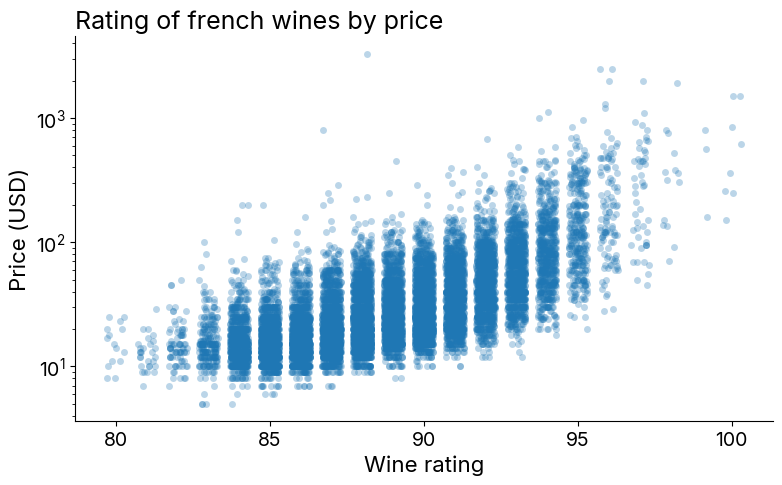

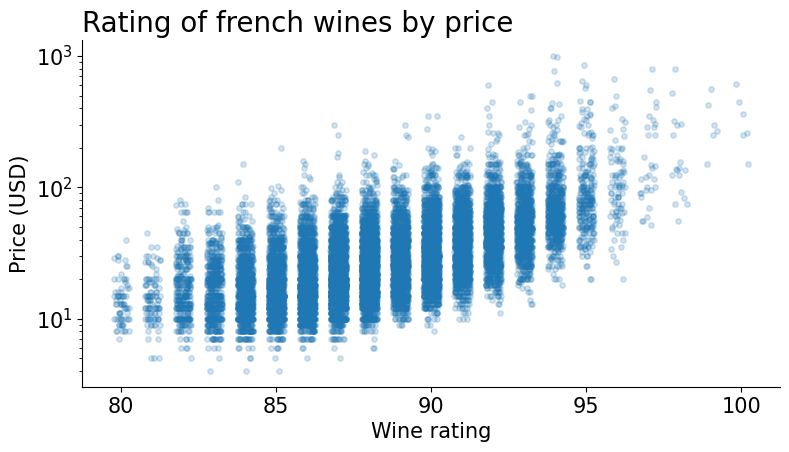

In [5]:
plt.figure(figsize=(9, 4.5))
plt.yscale('log')

plt.title('Rating of french wines by price', loc='left', fontsize=20)
plt.xlabel('Wine rating', fontsize=15)
plt.ylabel('Price (USD)', fontsize=15)
x = df['points']+np.random.uniform(-0.25, 0.25, len(df))
y = df['price']

plt.xticks([80, 85, 90, 95, 100, ])

#Берем не все точки, чтобы лучше было видно их действительную плотность распределения
select_ind = np.random.choice(np.arange(0, len(df)), size = len(df) // 5, replace=False)
x = x[select_ind]
y = y[select_ind]
plt.scatter(x=x, y=y,s=15 ,alpha=0.2)# linewidths=0.8)
plt.show()

### Задача 1.2 (0.5 балла)

Напишите код, который воспроизводит график:

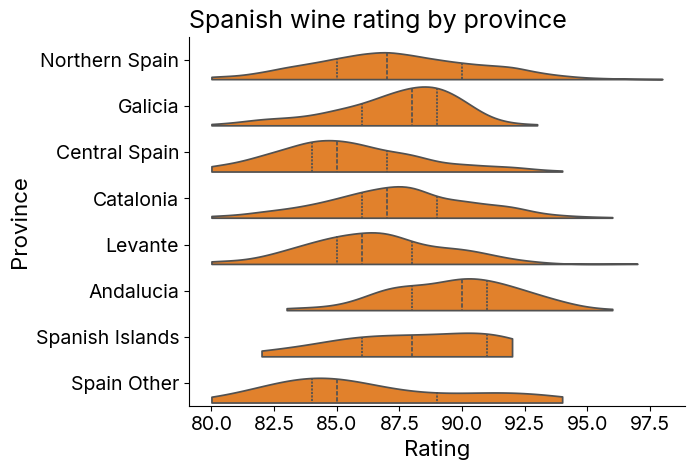

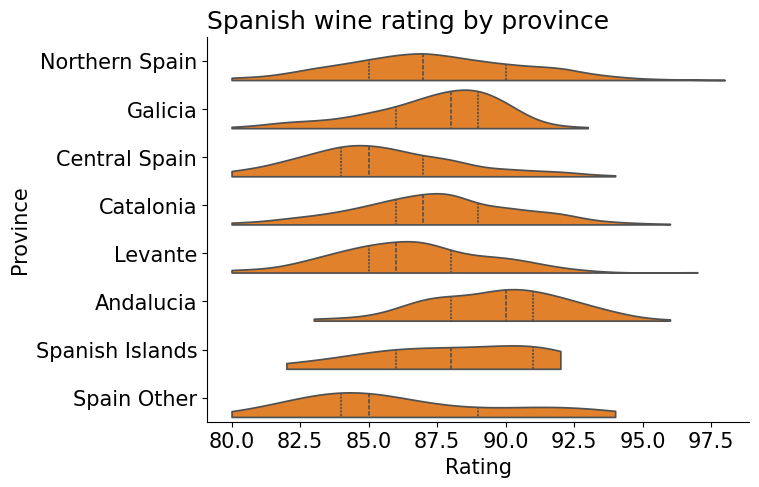

In [6]:
plt.figure(figsize=(7, 5))
spain_data = df[df['country'] == 'Spain'][['points', 'province']]

sns.violinplot(
    data=spain_data,
    x='points',
    y='province',
    split=True,
    inner='quartile',
    color='#ff7f0e',
    cut=0
)
plt.title('Spanish wine rating by province')
plt.xlabel('Rating')
plt.ylabel('Province')

plt.show()

### Задача 1.3 (1 балл)

Напишите код, который воспроизводит график:

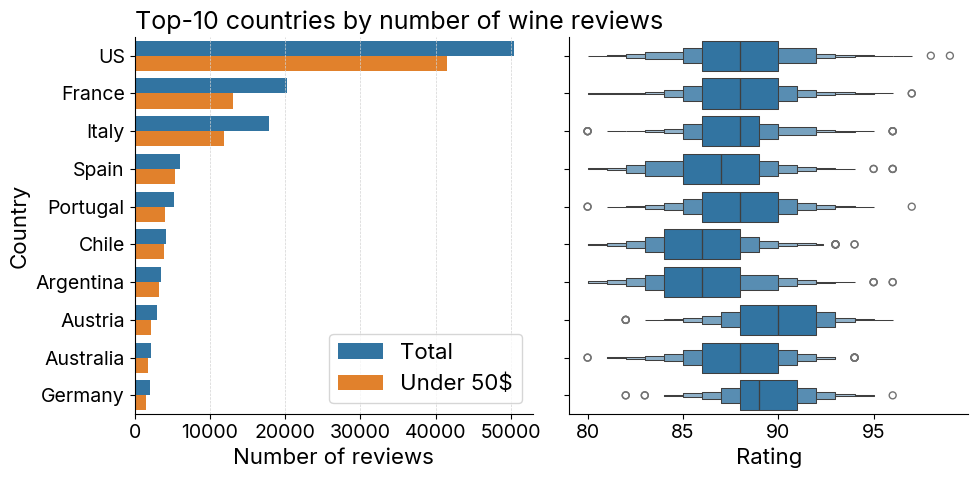

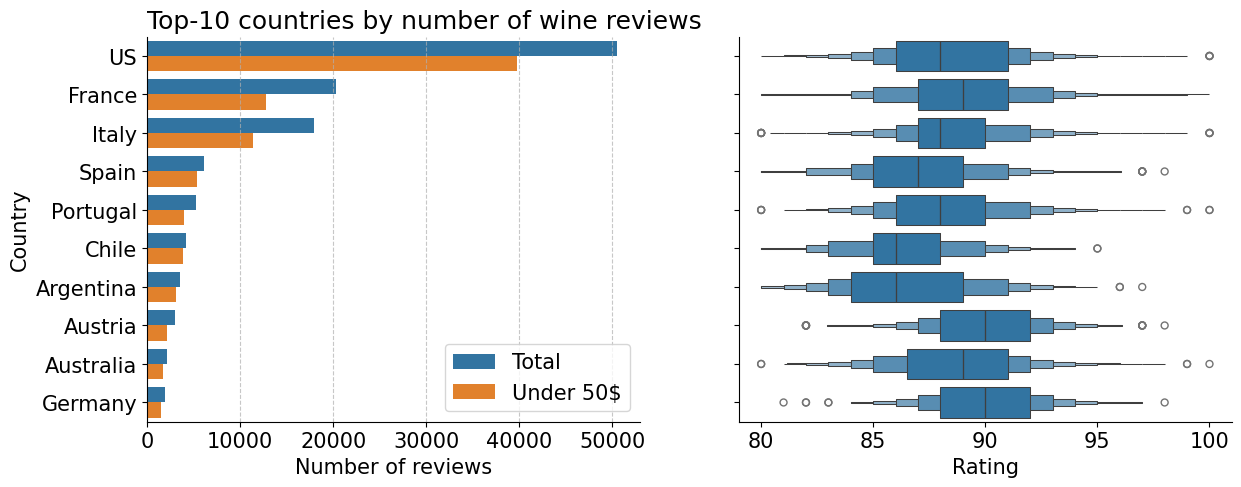

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))


#barplot
#-----------------------
top_10_countries = df['country'].value_counts().head(10).index
df_top = df[df['country'].isin(top_10_countries)][['country', 'price', 'points']]

total_counts = df_top.groupby('country').size()
under_50_counts = df_top[df_top['price'] < 50].groupby('country').size()

summary = pd.DataFrame({
    'country': top_10_countries,
    'Total': total_counts.reindex(top_10_countries, fill_value=0).values,
    'Under 50$': under_50_counts.reindex(top_10_countries, fill_value=0).values
})

df_long = summary.melt(
    id_vars='country',
    value_vars=['Total', 'Under 50$'],
    var_name='category_price',
    value_name='count'
)

sns.barplot(
    data=df_long,
    x='count',
    y='country',
    order=top_10_countries,
    hue='category_price',
    hue_order=['Total', 'Under 50$'],
    palette=['#1f77b4', '#ff7f0e'],
    ax=axes[0]
)
axes[0].set_title('Top-10 countries by number of wine reviews')
axes[0].set_xlabel('Number of reviews')
axes[0].set_ylabel('Country')
axes[0].legend(loc='lower right')
axes[0].grid(axis='x', linestyle='--', alpha=0.7)
axes[0].set_xticks([0, 10000, 20000, 30000, 40000, 50000])
#----------------

#boxenplot
sns.boxenplot(
    data=df_top,
    y='country',
    x='points',
    ax=axes[1],
    width=0.8,
    order=top_10_countries
)
axes[1].set_yticklabels([])
axes[1].set_ylabel('')
axes[1].set_xlabel('Rating')

plt.show()

### Задача 1.4 (1.5 балла)

Напишите код, который воспроизводит график:

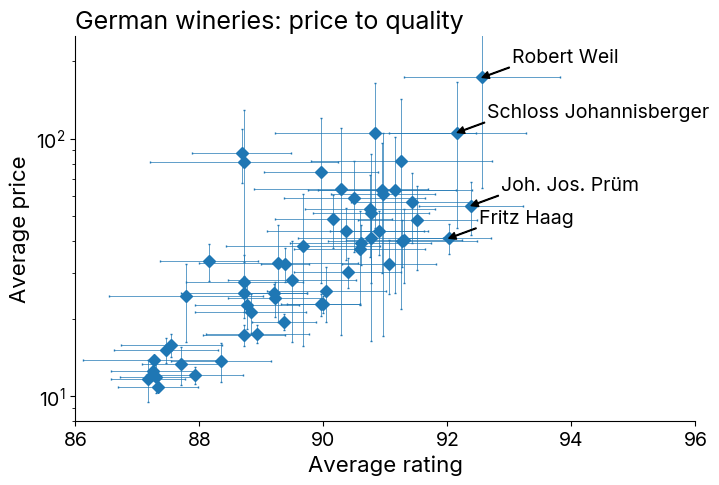

**Указание**: точки - средние, "усы" - стандартные отклонения. Взяты только винодельни с 10 или более отзывами в датасете.

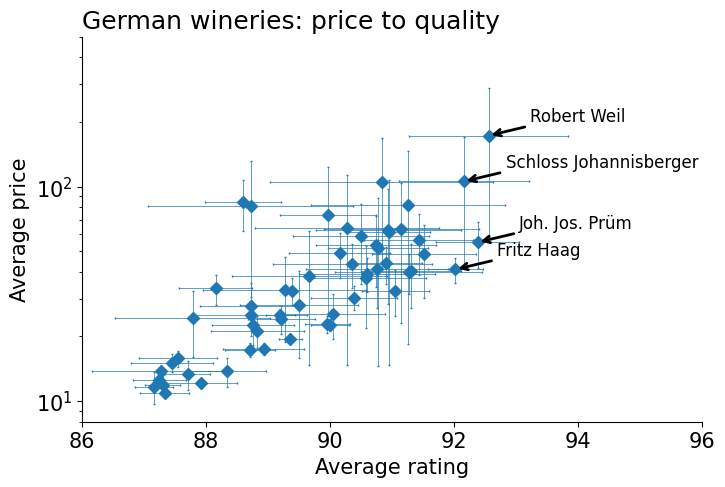

In [8]:
df_german = df[df['country']=='Germany']
wineries = df_german['winery'].value_counts().reset_index()
wineries = wineries[wineries['count'] >= 10]['winery']

# ind_take = np.random.choice(np.arange(0, len(wineries)), size=len(wineries)//2, replace=False)
# wineries = wineries[ind_take]
df_wineries = df[df['winery'].isin(wineries)][['winery', 'price', 'points']]
df_wineries_std_price = df_wineries[['winery', 'price']].groupby('winery').std().reset_index().rename(columns={'price': 'std_price'})
df_wineries_std_rating = df_wineries[['winery', 'points']].groupby('winery').std().reset_index().rename(columns={'points': 'std_rating'})

df_wineries_mean_price = df_wineries[['winery', 'price']].groupby('winery').mean().reset_index().rename(columns={'price': 'mean_price'})
df_wineries_mean_rating = df_wineries[['winery', 'points']].groupby('winery').mean().reset_index().rename(columns={'points': 'mean_rating'})

df_wineries_full_stats = pd.merge(
    pd.merge(df_wineries_mean_price, df_wineries_std_price, on='winery'),
    pd.merge(df_wineries_mean_rating, df_wineries_std_rating, on='winery'),
    on='winery'
)
std_price_min = df_wineries_full_stats['std_price'].min()
std_price_max = df_wineries_full_stats['std_price'].max()
df_wineries_full_stats['std_price'] = ((df_wineries_full_stats['std_price'] - std_price_min) /
                                             (std_price_max - std_price_min)) * 115

std_rating_min = df_wineries_full_stats['std_rating'].min()
std_rating_max = df_wineries_full_stats['std_rating'].max()
df_wineries_full_stats['std_rating'] = ((df_wineries_full_stats['std_rating'] - std_rating_min) /
                                              (std_rating_max - std_rating_min)) * 1.8
plt.figure(figsize=(8, 5))


plt.errorbar(
    x=df_wineries_full_stats['mean_rating'],
    y=df_wineries_full_stats['mean_price'],
    xerr=df_wineries_full_stats['std_rating'],
    yerr=df_wineries_full_stats['std_price'],
    marker='D',
    linestyle='',
    elinewidth=0.5,
    capsize=1,
    markersize=6,
)
known_wineries = ['Robert Weil', 'Schloss Johannisberger', 'Joh. Jos. Prüm', 'Fritz Haag']

for winery in known_wineries:
    row = df_wineries_full_stats.query(f"winery == '{winery}'").iloc[0]
    plt.annotate(
        winery,
        (row['mean_rating'], row['mean_price']),
        xytext=(30, 10),
        textcoords='offset points',
        fontsize=12,
        arrowprops=dict(
                arrowstyle='->',
                lw=2,
                relpos=(0, 0)
            )
    )
plt.xlabel('Average rating')
plt.ylabel('Average price')
plt.title('German wineries: price to quality')
plt.yscale('log')

plt.xticks(np.arange(86, 97, 2))
plt.xlim(86, 96)
plt.ylim(8, 500)

plt.show()

### Задача 1.5 (1.5 балла)

Напишите код, который воспроизводит график:

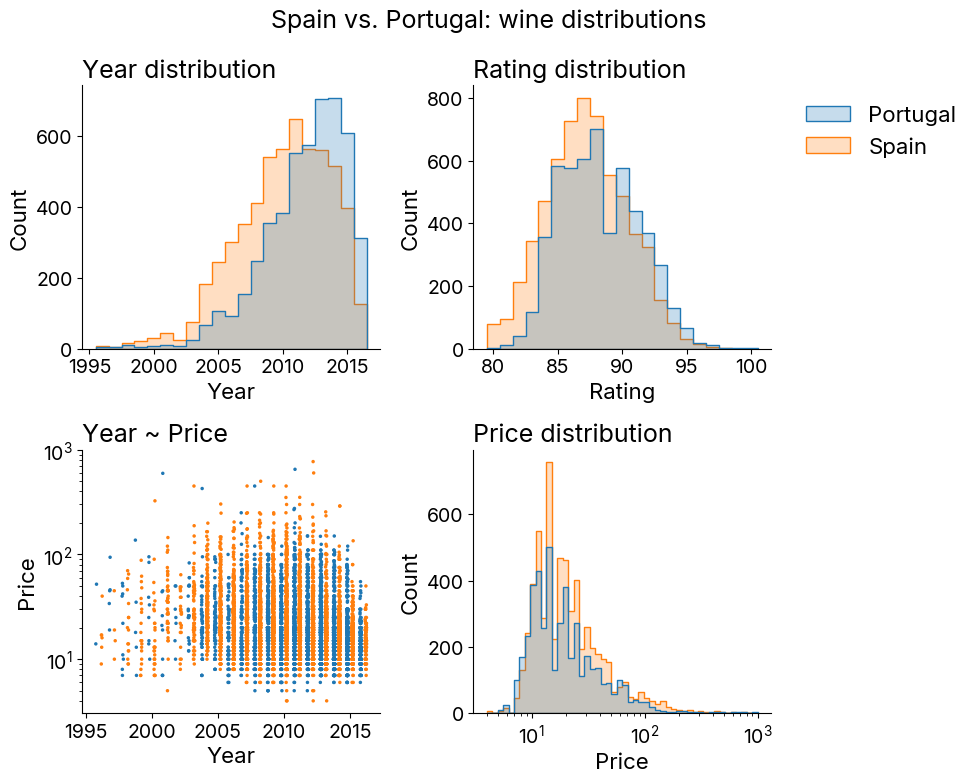

**Указание**: год получен по данным датасета с помощью средств Pandas. Годы вне диапазона [1996, 2016] считаются неизвестными.

In [10]:
df['title'].astype('string')

def search_year(text):

    years = np.arange(1995, 2017).astype('str')
    for year in years:
        if year in text:
            return np.int64(year)
    return np.nan
df['year'] = df['title'].apply(search_year)

/tmp/ipython-input-3308012879.py:105: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1][0].legend()


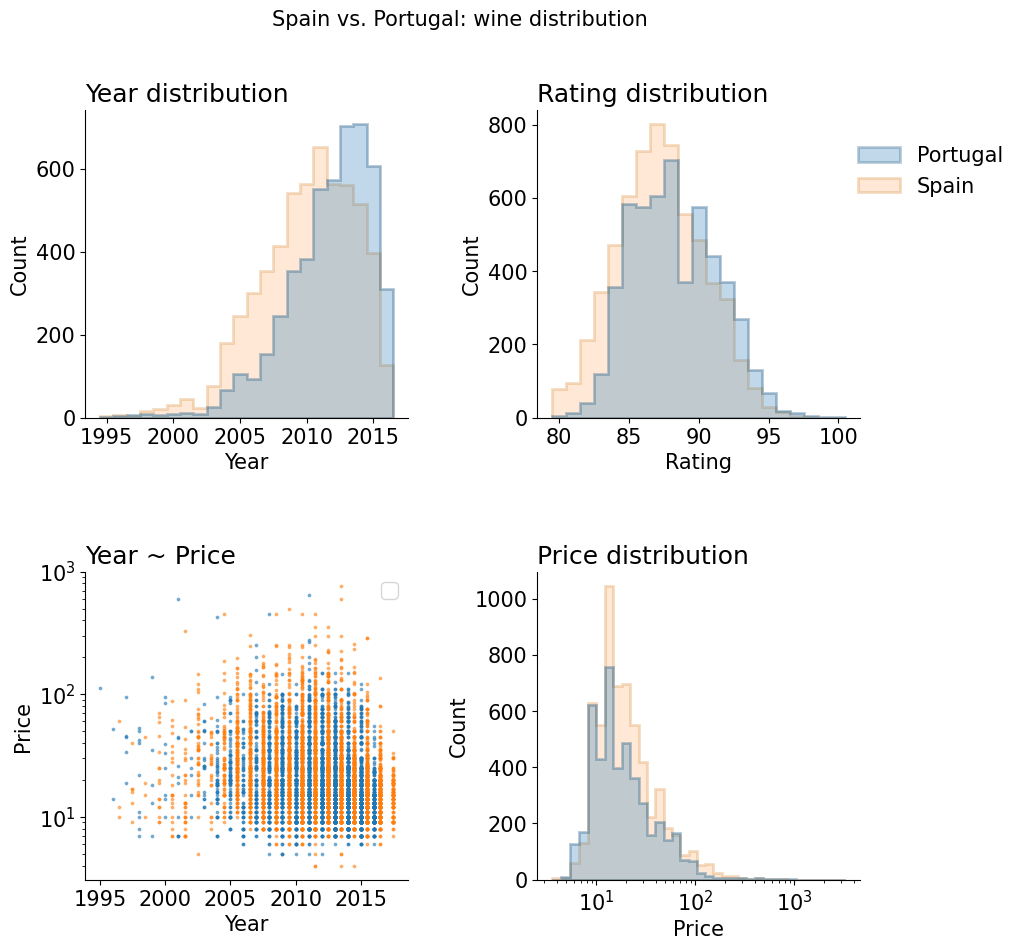

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
BINS_1_1 = 35

kwargs_blue = dict(
    alpha=0.3,
    histtype='stepfilled',
    color='#2f81b9',
    edgecolor='#215a82',
    linewidth=2,
    zorder=2,
    antialiased=False,
    align='left',
    rwidth=0.8
)

kwargs_orange = dict(
    alpha=0.3,
    histtype='stepfilled',
    color='#ffb87a',
    edgecolor='#d98c3a',
    linewidth=2,
    zorder=1,
    align='left',
    rwidth=0.8
)

years_bins = np.arange(df['year'].min(), df['year'].max() + 2, 1)
points_bins = np.arange(df['points'].min(), df['points'].max() + 2, 1)
price_bins = np.logspace(np.log10(df['price'].min()), np.log10(df['price'].max()), BINS_1_1 + 1)

axes[0, 0].hist(
    x=df.query('country == "Portugal"')['year'],
    bins=years_bins,
    **kwargs_blue,
)
axes[0, 0].hist(
    x=df.query('country == "Spain"')['year'],
    bins=years_bins,
    **kwargs_orange,
)

axes[0, 1].hist(
    x=df.query('country == "Portugal"')['points'],
    bins=points_bins,
    **kwargs_blue,
    label='Portugal',

)
axes[0, 1].hist(
    x=df.query('country == "Spain"')['points'],
    bins=points_bins,
    **kwargs_orange,
    label='Spain',

)

# SCATTER PLOT (добавлен)

SIZE = 3
portugal_data = df.query('country == "Portugal"')
spain_data = df.query('country == "Spain"')
np.random.seed(42)
portugal_years_noisy = portugal_data['year']
spain_years_noisy = spain_data['year'] + SIZE / 2

axes[1, 0].scatter(
    portugal_years_noisy,
    portugal_data['price'],
    alpha=0.5,
    s=SIZE
)
axes[1, 0].scatter(
    spain_years_noisy,
    spain_data['price'],
    alpha=0.5,
    s=SIZE
)


axes[1, 1].hist(
    x=df.query('country == "Portugal"')['price'],
    bins=price_bins,
    **kwargs_blue,
)
axes[1, 1].hist(
    x=df.query('country == "Spain"')['price'],
    bins=price_bins,
    **kwargs_orange,
)

# Оформление
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Count')
axes[0][0].set_title('Year distribution')
axes[0][0].set_xticks([1995, 2000, 2005, 2010, 2015])

axes[0][1].set_xlabel('Rating')
axes[0][1].set_ylabel('Count')
axes[0][1].set_title('Rating distribution')
axes[0][1].legend(loc='center right', bbox_to_anchor=(1.5, 0.8), frameon=False)

axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Price')
axes[1][0].set_title('Year ~ Price')
axes[1][0].legend()
axes[1][0].set_xticks([1995, 2000, 2005, 2010, 2015])
axes[1][0].set_yscale('log')

axes[1][1].set_xlabel('Price')
axes[1][1].set_ylabel('Count')
axes[1][1].set_title('Price distribution')
axes[1][1].set_xscale('log')

plt.suptitle('Spain vs. Portugal: wine distribution', fontsize=15)
plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.show()


### Задача 1.6 (1 балл)

Напишите код, который воспроизводит график:

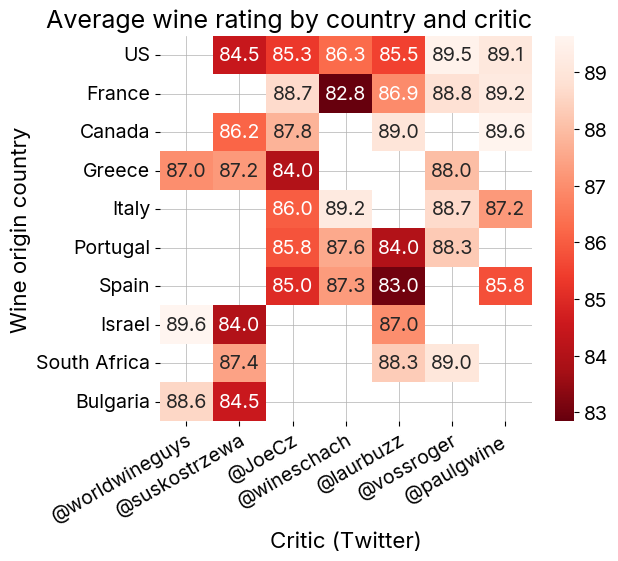

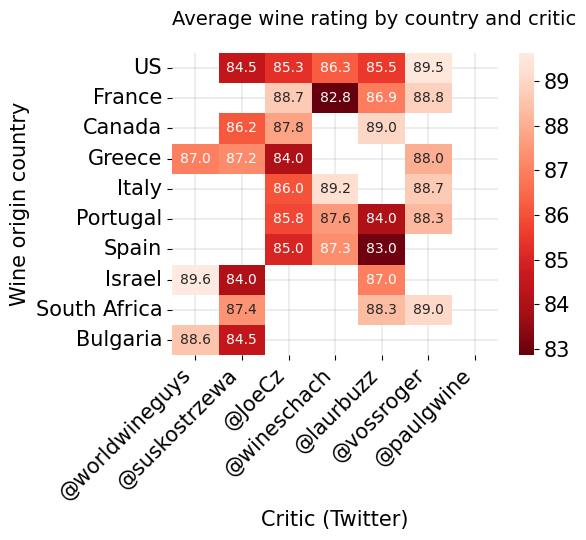

In [16]:
countries = [
    "US", "France", "Canada", "Greece", "Italy",
    "Portugal", "Spain", "Israel", "South Africa", "Bulgaria"
]
users = [
    "@worldwineguys", "@suskostrzewa", "@JoeCz", "@wineschach",
    "@laurbuzz", "@vossroger", "@paulgwine"
]

df_map = df.query("country in @countries and taster_twitter_handle in @users")
map_table = df_map.pivot_table(
    values='points',
    index='country',
    columns='taster_twitter_handle',
    aggfunc='mean'
)

countries_ordered = ["US", "France", "Canada", "Greece", "Italy",
    "Portugal", "Spain", "Israel", "South Africa", "Bulgaria"]

users_ordered = ["@worldwineguys", "@suskostrzewa", "@JoeCz", "@wineschach",
    "@laurbuzz", "@vossroger", "@paulgwine"]

map_table_ordered = map_table.reindex(index=countries_ordered, columns=users_ordered)

fig, ax = plt.subplots(figsize=(6, 5.5))
ax.set_axisbelow(True)
ax.grid(axis='both', linestyle='-', color='gray', linewidth=0.2)
sns.heatmap(
    map_table_ordered,
    annot=True,
    fmt=".1f",
    center=86.5,
    cmap='Reds_r',
    ax=ax,
)


ax.set_title('Average wine rating by country and critic', fontsize=14, pad=20)
ax.set_xlabel('Critic (Twitter)')
ax.set_ylabel('Wine origin country')

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax.get_yticklabels(), rotation=0)

fig.tight_layout()
plt.show()


**Указание**: взяты не все страны и критики <font color='lightgray'>(были выбраны критики, которые оценивали наибольшее количество стран, а затем выбраны страны, вино из которых оценивали наибольшее число выбранных критиков, но можно просто выбрать страны и критиков так же, как на картинке)</font>

В ячейках указан средный рейтинг (`points`), выданный критиком винам из определенной страны.

## Блок 2. **Tool**: информация о колонках датафрейма (4 балла)

#### чтобы получить полный балл, нужно прикрепить ваш правильно работающий пример в отдельном окошке

### Несколько слов про tool-блоки в домашках

Классного датасаентиста помимо всего прочего отличает его "портфель" - набор готового кода на все случаи жизни,
    который он носит с собой где бы он ни работал и какую бы домашку не делал. Во время различных профессиональных занятий
    всегда хорошо сохранить функцию, которая помогла вам сейчас решить конкретную задачу себе "в папочку", чтобы столкнувшись
    с такой / похожей задачей дальше, иметь под рукой oneliner, который сделает все так, как вам хочется.
    
Время от времени в ваших домашках будут появляться tool-блоки, в которых мы будем просить вас написать что-нибудь, что вам
    пригодится в дальнейшем, а также закрепляет пройденный материал.
    Настоятельно рекомендуем завести себе хранилище, куда вы будете складывать функции из домашек,
    а также те, которые напишете сами и сочтете достойными.

В дальнейшем вы сможете импортировать ваши функции в любой проект, например, так:

```
import sys
sys.path.append('/*SOME_PATH*/my_code/my_utils')
from utils.plot import plot_denisty
```

<br/>
Скорее всего, со временем вы захотите дополнить / исправить / переделать под себя эти функции, и это правильно,
    однако в домашках нужно сделать ровно то, что написано в задании - ни больше, ни меньше. Все остальное - уже самостоятельно.
    Можно воспринимать функции из домашек как шаблоны, вдохновляющие вас на дальнейшее творчество.
    Чтобы вы в будущем могли разобраться, что происходит у вас в коде (а тем более - проверяющие), мы будем просить вас писать
    комментарии к вашему коду и докстринги (пример ниже). Это несложная и очень полезная привычка, которая не раз выручит вас.

Условия проверки tool-блоков:
- Если какая-то часть задания не реализована или вы сделали что-то запрещенное, вы получаете 0 баллов за задачу
- Если сделано все, что описано в задании и не сделано ничего запрещенного, есть docstring и комментарии к коду,
    вы получаете полный балл за задачу
- После получения полного балла, могут быть вычтены баллы за любого рода неадекватность. Размер штрафа субъективен
    и коррелирует с масштабом неадекватности - на что-то можно закрыть глаза, на что-то не получится.
- Вспомогательные принты и любые следы тестирования - неадекватность
- Неадекватностью может являться кривое выполнение пункта задания, однако если мы посчитаем пункт кривым,
    это не значит, что у вас 0 за задачу. Не сделать и сделать неправильно - разные вещи
- Некоторые советы и намеки на то, что считается адекватным для конкретной задачи, можно будет найти в задании :)

### Задача 2.1 (4 балла)

Напишите функцию `get_df_info`, которая будет выводить информацию о колонках входного датафрейма. Функция должна возвращать датафрейм следующего формата:

- индекс - все колонки входного датафрейма


- в колонках результирующего датафрейма содержится следующая информация (см. пример ниже):
    - тип данных
        - используйте `df.col.dtype.name`, это стабильнее, чем `df.col.dtype`
    - количество уникальных элементов
        - включая наны
    - доля нанов в колонке
    - доля нулей в колонке
    - доля пустых строк в колонке
    - доля самого частовстречаемого элемента в колонке + сам этот элемент (aka `vc_max`)
        - исключая наны
        - в одной колонке или в двух разных - решать вам
        - если таких несколько - можно брать любой
        
    - два разных примера содержимого колонки
        - исключая наны
        - в одной колонке или в двух разных - решать вам
        
    - `trash_score` колонки: max([суммарная доля нанов, нулей и пустых строк], [`vc_max`.доля if `vc_max`.доля > thr else 0])
        - thr нужно принимать в качестве аргумента функции, поставив по умолчанию что-то адекватное
      
      
- про адекватность
    - нужно сделать так, чтобы как можно больше выводимой вами информации было понятно глазу без доп. усилий
    - округляйте до трех знаков доли
    - выводите чистый 0 спецсимволом, чтобы не путать с округлившимся 0.00001 (напр. '' или -1)
    - если нужно, выводите числа в виде строк
    - убедитесь, что в случае когда двух примеров не набирается, вы можете отличить информацию "примера нет" от пустой строки
    - можете использовать доп. символы, чтобы отличать колонки быстрее, где нужно (напр. 'z:', 'n:', 'e:')
    - обрабатывайте любые другие возникающие неадекватные ситуации и приводите их в адекватный вид :)
    
    
- запрещено: итерироваться по строкам входного датафрейма в любом виде (по колонкам можно)

Предлагается реализовать функцию на датасете Titanic, немного измененном следующим образом:

In [ ]:
!wget https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/titanic_train.csv -O titanic_train.csv

--2025-10-10 06:20:28--  https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/titanic_train.csv
Resolving data.bioml.ru (data.bioml.ru)... 188.120.231.217
Connecting to data.bioml.ru (data.bioml.ru)|188.120.231.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/csv]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  59.76K  --.-KB/s    in 0.1s    

2025-10-10 06:20:29 (481 KB/s) - ‘titanic_train.csv’ saved [61194/61194]



In [131]:
import pandas as pd

df = pd.read_csv('titanic_train.csv')
df['Embarked'] = df['Embarked'].replace('Q', '')
df['PassengerId'] = df['PassengerId'].astype('string')

In [220]:
def get_df_info(df, *args, **kwargs):
    '''
    docstring example:

    Выводит инфу о колонках датафрейма в виде датафрейма

    df: исходный датафрейм
    ...

    returns: pd.DataFrame с инфой

    '''
    trh = 0.1
    if 'trh' in kwargs:
        trh = kwargs['trh']

    def format_value(x, max_len=20):
        if pd.isna(x):
            #для NaN/None/pd.NA
            return '<Nan>'
        if isinstance(x, str) and len(x) > max_len:
            return x[:max_len-3] + '...'
        elif isinstance(x, float):
            if x == 0:
                return '-1'  #если чистый ноль то вернется без точки
            return f'{x:.3f}'.rstrip('0')
        else:
            return x

    def get_two_examples(series):
        uniq = series.dropna().unique()
        ex1 = uniq[0] if len(uniq) > 0 else np.nan
        ex2 = uniq[1] if len(uniq) > 1 else np.nan
        return pd.Series([ex1, ex2], index=['example_1', 'example_2'])

    def shape_zero(serios):
        count = 0
        for value in serios:
            # Пропускаем NaN / None / pd.NA
            if pd.isna(value):
                continue
            if isinstance(value, str) and value == '':
                count += 1
            elif isinstance(value, (int, float, np.integer, np.floating)) and value == 0:
                count += 1
            elif isinstance(value, (bool, np.bool_)) and value is False:
                count += 1
        shape = count/serios.shape[0]
        return f'z:{shape:.3f}' if shape != 0 else -1

    def shape_nan(serios):
        shape = serios.isna().mean()
        return f'n:{shape:.3f}' if shape != 0 else -1

    def shape_empty_str(serios):
        count = 0
        for elem_serios in serios:
            if isinstance(elem_serios, str) and elem_serios=='':
                count += 1
        shape = count/serios.shape[0]
        return f'e:{shape:.3f}' if shape != 0 else -1

    def compute_trash_score(row_df_info, trh=trh):
        '''
        `trash_score` колонки: max(
            [суммарная доля нанов, нулей и пустых строк],
            [`vc_max`.доля if `vc_max`.доля > thr else 0]
            )
        '''
        nan = float(row_df_info['nan'].split(':')[1]) if isinstance(row_df_info['nan'], str) else 0
        zero = float(row_df_info['zero'].split(':')[1]) if isinstance(row_df_info['zero'], str) else 0
        empty_str = float(row_df_info['empty_str'].split(':')[1]) if isinstance(row_df_info['empty_str'], str) else 0

        pos1 = nan + zero + empty_str
        try:
            pos2 = float(row_df_info['vc_max'].strip('()').split(',')[1])
        except (ValueError, IndexError):
            pos2 = 0
        pos2 = pos2 if pos2 > trh else 0

        return np.max([pos1, pos2])

    def popular_value_shape(serios):
        value_counts = serios.value_counts()
        if len(value_counts) > 0:
            pop_value, pop_count = value_counts.index[0], value_counts.values[0]
            pop_shape = pop_count / len(serios)
            return f'({pop_value}, {pop_shape:.3f})'
        else:
            return '-1'

    df_info = pd.DataFrame({}, index=df.columns)

    df_info['dtype'] = df.apply(lambda x: x.dtype.name)
    df_info['nunique'] = df.nunique()

    examples = df.apply(get_two_examples)
    df_info[['example_1', 'example_2']] = examples.T

    df_info['zero'] = df.apply(shape_zero)
    df_info['nan'] = df.apply(shape_nan)
    df_info['empty_str'] = df.apply(shape_empty_str)
    df_info['vc_max'] = df.apply(popular_value_shape)
    df_info['trash_score'] = df_info.apply(compute_trash_score, axis=1)

    df_info = df_info.applymap(format_value)

    return df_info.sort_values(by='trash_score', ascending=False)

In [221]:
# ваш пример
get_df_info(df, trh=1)

/tmp/ipython-input-2993352892.py:106: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_info = df_info.applymap(format_value)


,dtype,nunique,example_1,example_2,zero,nan,empty_str,vc_max,trash_score
Cabin,object,147,C85,C123,-1,n:0.771,-1,"(G6, 0.004)",0.771
Parch,int64,7,0,1,z:0.761,-1,-1,"(0, 0.761)",0.761
SibSp,int64,7,1,0,z:0.682,-1,-1,"(0, 0.682)",0.682
Survived,int64,2,0,1,z:0.616,-1,-1,"(0, 0.616)",0.616
Age,float64,88,22.,38.,-1,n:0.199,-1,"(24.0, 0.034)",0.199
Embarked,object,3,S,C,z:0.086,n:0.002,e:0.086,"(S, 0.723)",0.174
Fare,float64,248,7.25,71.283,z:0.017,-1,-1,"(8.05, 0.048)",0.017
PassengerId,string,891,1,2,-1,-1,-1,"(12, 0.001)",-1
Pclass,int64,3,3,1,-1,-1,-1,"(3, 0.551)",-1
Name,object,891,"Braund, Mr. Owen ...","Cumings, Mrs. Joh...",-1,-1,-1,"(Dooley, Mr. Patr...",-1


In [ ]:
# Это пример, не запускайте эту ячейку

# WARNING: пример не обязан соблюдать все пункты задания, но вы обязаны :)

get_df_info(df)

,dtype,nunique,example_1,example_2,zero,nan,empty_str,vc_max,trash_score
,,,,,,,,,
Cabin,object,147,C148,B42,-1,n: 0.771,-1,"(0.02, G6)",0.771
Parch,int64,7,6,4,z: 0.761,-1,-1,"(0.761, 0)",0.761
SibSp,int64,7,8,5,z: 0.682,-1,-1,"(0.682, 0)",0.682
Survived,int64,2,1,0,z: 0.616,-1,-1,"(0.616, 0)",0.616
Age,float64,88,74.0,34.5,-1,n: 0.199,-1,"(0.042, 24.0)",0.199
Embarked,object,3,'',C,-1,n: 0.002,e: 0.086,"(0.724, S)",0.089
Fare,float64,248,10.5167,9.8458,z: 0.017,-1,-1,"(0.048, 8.05)",0.017
Ticket,object,681,370376,111369,-1,-1,-1,"(0.008, 347082)",-1
Sex,object,2,female,male,-1,-1,-1,"(0.648, male)",-1


***Вопрос:*** Как вы думаете, какие проблемы с этой функцией могут возникнуть при применении ее на других датасетах?

По идее, в большинстве случаев никаких. Если в датасете будут  какие то нестандартные форматы чисел, отличающиеся от int и float, то могут возникнуть проблемы в рассчетах некоторых столбцов